In [3]:
import rawpy
import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
path = '../data/input/captures_1.raw'
# raw = rawpy.imread(path)
# rgb = raw.postprocess()
# imageio.imsave('default.tiff', rgb)
width = 3840
height = 2160

In [5]:
npimg = np.fromfile(path, dtype=np.uint16)
imageSize = (height, width)
npimg = npimg.reshape(imageSize)

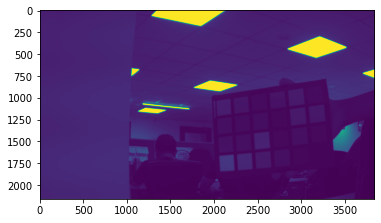

In [6]:
output_file = 'out.tiff'
# Image.fromarray(255*npimg/1023.0).save(output_file)
plt.imshow(npimg)
plt.show()

In [7]:
print(npimg.astype(np.uint8))

[[134  10 198 ...   9   6 200]
 [138 135 202 ... 198 200 135]
 [ 70 138 134 ... 137   6 200]
 ...
 [139   8  11 ... 132 196  68]
 [135  11 135 ...   4   4   4]
 [203 136 203 ... 132  68  68]]


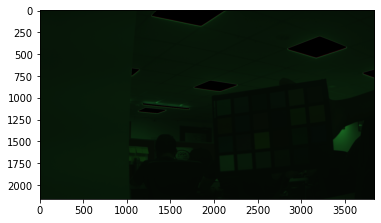

In [8]:
rggb = (npimg/(255*255.0)*255.0).astype(np.uint8)
rgb = np.zeros((npimg.shape[0], npimg.shape[1], 3), dtype=np.uint8)

rgb[1::2, 1::2, 2] = rggb[1::2, 1::2]    # blue
rgb[0::2, 1::2, 1] = rggb[0::2, 1::2]  # green
rgb[1::2, 1::2, 1] = rggb[1::2, 0::2]  # green
rgb[0::2, 0::2, 0] = rggb[0::2, 0::2]     # red
# print(rgb)
plt.imshow(rgb)
plt.show()
# rgb[:,:,2]

In [9]:
print(rggb.dtype)

uint8


In [10]:
rgb_d = rgb
for c in range(3):
    # for row in range(1, height-1):
        # for col in range(1, width-1):
            # if rgb[row, col, c] == 0:
                # rgb[row, col, c] = ((rgb[row+1, col, c] + rgb[row-1, col, c] + rgb[row, col+1, c] + rgb[row, col-1, c])+
                                    # (rgb[row+1, col+1, c] + rgb[row-1, col+1, c] + rgb[row-1, col-1, c] + rgb[row+1, col-1, c]))/4
    v = 8 if c==1 else 4
    (s, d) = (1, 0) if c==2 else (0, 1)
    rgb_d[d::2, :, c] += rgb[s::2, :, c]//v
    rgb_d[:, d::2, c] += rgb[:, s::2, c]//v
    (s, d) = (1, 2) if c==2 else (2, 1)
    if c==2:
        rgb_d[d::2, :, c] += rgb[s:-2:2, :, c]//v
        rgb_d[:, d::2, c] += rgb[:, s:-2:2, c]//v
    else:
        l=-2
        rgb_d[d:l:2, :, c] += rgb[s::2, :, c]//v
        rgb_d[:, d:l:2, c] += rgb[:, s::2, c]//v


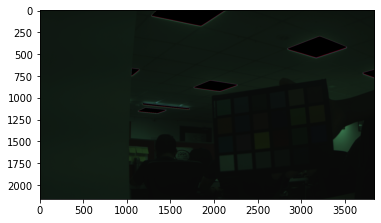

In [11]:
plt.imshow(rgb_d)
plt.show()

In [12]:
print(np.max(npimg)/(256*256.0-1))

1.0


(2160, 3840, 3)


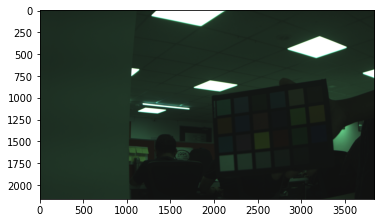

In [13]:

rggb = (npimg/(256*256.0-1)*255.0).astype(np.uint8)
# img_rgb = cv2.cvtColor(rggb, cv2.COLOR_BayerRG2RGB)
img_rgb = cv2.demosaicing(rggb, cv2.COLOR_BayerRG2BGR)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

# Apply White Balance


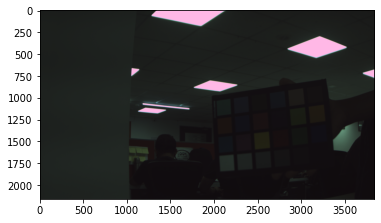

In [14]:
# wb = cv2.xphoto.createLearningBasedWB()
# wb = cv2.xphoto.createSimpleWB()
wb = cv2.xphoto.createGrayworldWB()
# wb.setSaturationThreshold(0.99)
img_wb = wb.balanceWhite(img_rgb)

plt.imshow(img_wb)
plt.show()

# Apply Brightness and gamma correction

In [15]:
def gammaCorrection(img, gamma=1.0):
    invG = 1 / gamma

    table = [((i / 255.0) ** invG) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv2.LUT(img, table)

In [16]:
def brightnessCorrection(img_gm, alpha=1.0, beta=0.0):
    return np.clip(alpha * img_gm + beta, 0, 255).astype(np.uint8)

[  0   9  14  18  22  25  28  30  33  35  37  40  42  44  46  48  50  51
  53  55  57  58  60  61  63  65  66  68  69  70  72  73  75  76  77  79
  80  81  83  84  85  87  88  89  90  91  93  94  95  96  97  98 100 101
 102 103 104 105 106 107 108 109 110 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 127 128 129 130 131 132 133 134 135 136 137
 138 139 139 140 141 142 143 144 145 146 147 147 148 149 150 151 152 152
 153 154 155 156 157 157 158 159 160 161 162 162 163 164 165 166 166 167
 168 169 170 170 171 172 173 173 174 175 176 176 177 178 179 179 180 181
 182 182 183 184 185 185 186 187 188 188 189 190 190 191 192 193 193 194
 195 195 196 197 198 198 199 200 200 201 202 202 203 204 205 205 206 207
 207 208 209 209 210 211 211 212 213 213 214 215 215 216 217 217 218 219
 219 220 221 221 222 222 223 224 224 225 226 226 227 228 228 229 230 230
 231 231 232 233 233 234 235 235 236 236 237 238 238 239 239 240 241 241
 242 243 243 244 244 245 246 246 247 247 248 249 24

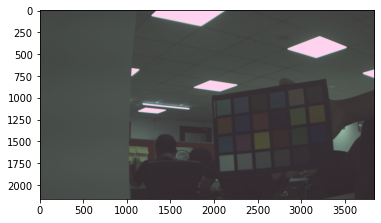

In [17]:
img_gm = gammaCorrection(img_wb, 1.7)
plt.imshow(img_gm)
plt.show()

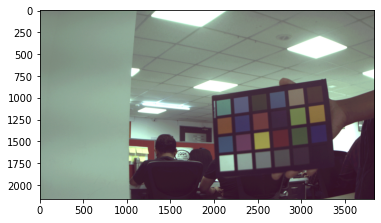

In [18]:
img_bc = brightnessCorrection(img_gm, alpha=4.0, beta=-150.0)
plt.imshow(img_bc)
plt.show()

In [20]:
3840*2160

8294400